In [ ]:
import sys

print(sys.executable)

In [10]:
from pathlib import Path
import pandas as pd

cwd = (Path.cwd())
path = cwd.joinpath('../dataset_clean.csv')

df = pd.read_csv(path)

df.head()



,ticket_id,created_at,updated_at,channel,model,dialect,title_ar,description_ar,category_level_1,category_level_2,category_level_3,category_path,tags,labels_json,impact,urgency,priority,sentiment
0,TCKT-001-001,2026-02-04T22:41:00+02:00,2026-02-05T02:41:00+02:00,email,gemini-3-flash,Egyptian,السيستم واقع,يا جماعة السيستم كله مش شغال عند كل الناس في ا...,Service,Incident,Outage,Service > Incident > Outage,"[""outage"", ""system""]","{""l1"": ""Service"", ""l2"": ""Incident"", ""l3"": ""Out...",3,5,4,negative
1,TCKT-001-002,2026-02-10T12:51:00+02:00,2026-02-10T18:51:00+02:00,portal,gemini-3-flash,Egyptian,الأوتلوك بيهنج,كل ما أفتح الأوتلوك بيعمل Not Responding ويقفل...,Software,Email/Calendar,Outlook Issue,Software > Email/Calendar > Outlook Issue,"[""outlook"", ""sync""]","{""l1"": ""Software"", ""l2"": ""Email/Calendar"", ""l3...",4,2,3,neutral
2,TCKT-001-003,2026-02-02T15:25:00+02:00,2026-02-03T10:25:00+02:00,phone,gemini-3-flash,Egyptian,مشكلة في الـ Remote Access,مش عارف أدخل ريموتلي من البيت، الـ VPN بيفصل ك...,Network,VPN,Connection Failure,Network > VPN > Connection Failure,"[""tunnel"", ""vpn""]","{""l1"": ""Network"", ""l2"": ""VPN"", ""l3"": ""Connecti...",1,2,2,negative
3,TCKT-001-004,2026-02-11T04:13:00+02:00,2026-02-12T17:13:00+02:00,email,gemini-3-flash,Egyptian,الإكسيل بيقفل,كل ما أفتح ملف إكسيل كبير البرنامج بيقفل فجأة ...,Software,Office Apps,Crash,Software > Office Apps > Crash,"[""office"", ""excel""]","{""l1"": ""Software"", ""l2"": ""Office Apps"", ""l3"": ...",4,1,3,positive
4,TCKT-001-005,2026-02-16T05:10:00+02:00,2026-02-16T10:10:00+02:00,phone,gemini-3-flash,Egyptian,حساب مغلق,جيت أفتح السيستم قالي Account Locked. مش عارف ...,Access,Account,Account Locked,Access > Account > Account Locked,"[""access"", ""locked""]","{""l1"": ""Access"", ""l2"": ""Account"", ""l3"": ""Accou...",4,3,4,positive


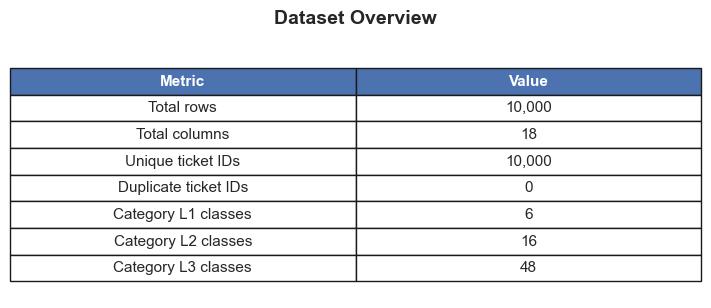

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

sns.set_theme(style="whitegrid", font_scale=1.1)
PALETTE = "Set2"

def wrap_labels(ax, width=14):
    """Wrap long tick labels so charts stay readable."""
    ax.set_xticks(ax.get_xticks())
    labels = [textwrap.fill(l.get_text(), width) for l in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha="right")

# ── 1. Dataset Overview Table ─────────────────────────────────────────
overview = pd.DataFrame({
    "Metric": [
        "Total rows",
        "Total columns",
        "Unique ticket IDs",
        "Duplicate ticket IDs",
        "Category L1 classes",
        "Category L2 classes",
        "Category L3 classes",
    ],
    "Value": [
        f"{len(df):,}",
        str(df.shape[1]),
        f"{df['ticket_id'].nunique():,}",
        f"{df.duplicated(subset='ticket_id').sum():,}",
        str(df['category_level_1'].nunique()),
        str(df['category_level_2'].nunique()),
        str(df['category_level_3'].nunique()),
    ]
})

fig, ax = plt.subplots(figsize=(6, 3.2))
ax.axis("off")
tbl = ax.table(cellText=overview.values, colLabels=overview.columns,
               loc="center", cellLoc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1.2, 1.6)
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor("#4C72B0")
        cell.set_text_props(color="white", weight="bold")
ax.set_title("Dataset Overview", fontsize=14, weight="bold", pad=20)
fig.subplots_adjust(left=0.02, right=0.98)
plt.show()



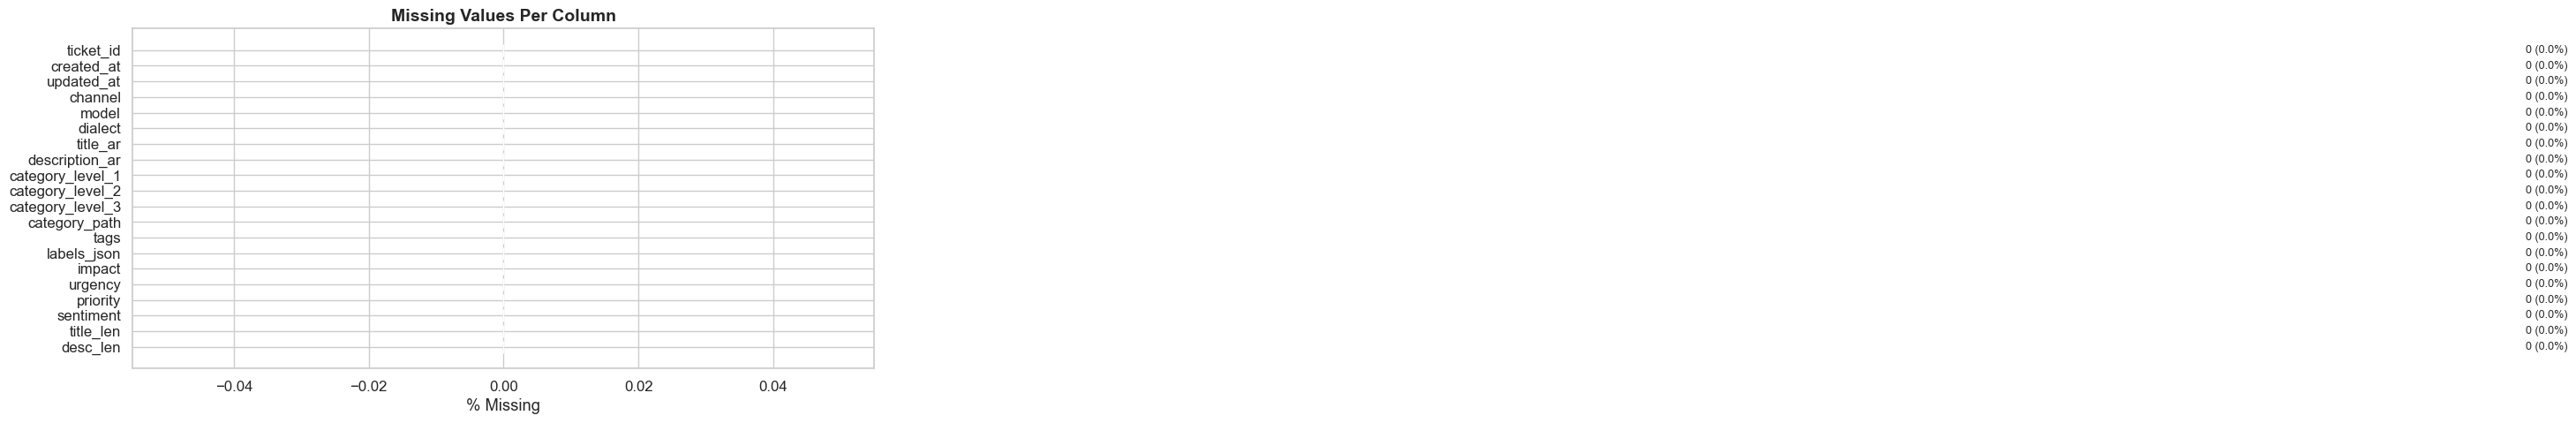

In [29]:
# ── 2. Missing Data Per Column ────────────────────────────────────────
missing = df.isnull().sum().rename("Missing").to_frame()
missing["% Missing"] = (missing["Missing"] / len(df) * 100).round(2)
missing = missing.sort_values("Missing", ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
colors = ["#e74c3c" if v > 0 else "#2ecc71" for v in missing["Missing"]]
ax.barh(missing.index, missing["% Missing"], color=colors)
ax.set_xlabel("% Missing")
ax.set_title("Missing Values Per Column", fontsize=14, weight="bold")
ax.invert_yaxis()
for i, (val, pct) in enumerate(zip(missing["Missing"], missing["% Missing"])):
    ax.text(pct + 0.3, i, f"{val:,} ({pct}%)", va="center", fontsize=9)
fig.subplots_adjust(left=0.2)
plt.show()


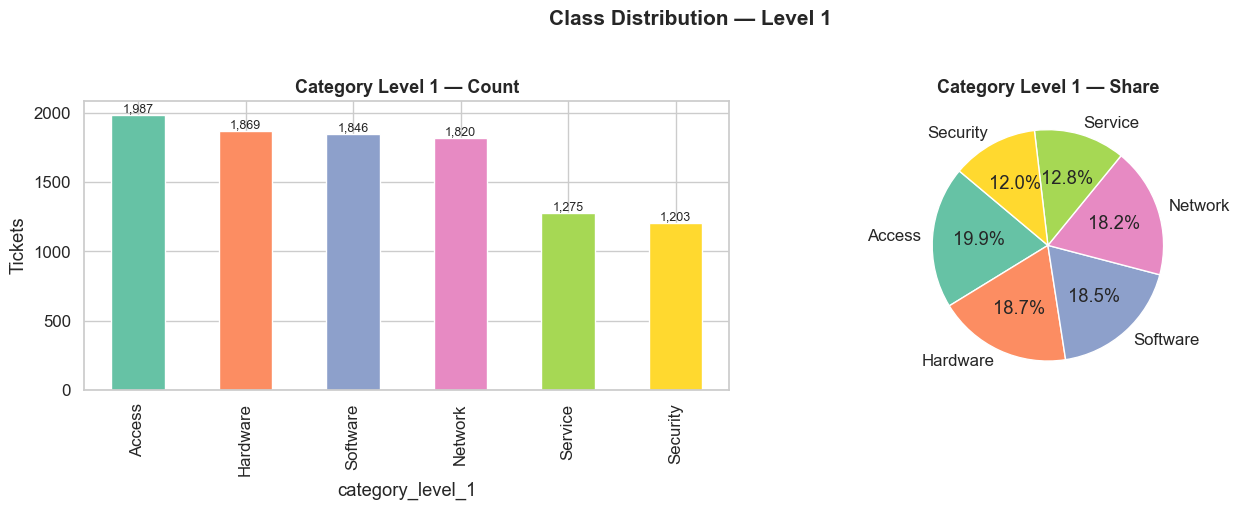

In [13]:
# ── 3. Category Level 1 — Distribution ────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

counts_l1 = df["category_level_1"].value_counts()
counts_l1.plot.bar(ax=axes[0], color=sns.color_palette(PALETTE, len(counts_l1)))
axes[0].set_title("Category Level 1 — Count", fontsize=13, weight="bold")
axes[0].set_ylabel("Tickets")
for p in axes[0].patches:
    axes[0].annotate(f"{int(p.get_height()):,}",
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha="center", va="bottom", fontsize=9)

counts_l1.plot.pie(ax=axes[1], autopct="%1.1f%%", startangle=140,
                   colors=sns.color_palette(PALETTE, len(counts_l1)))
axes[1].set_ylabel("")
axes[1].set_title("Category Level 1 — Share", fontsize=13, weight="bold")

plt.suptitle("Class Distribution — Level 1", fontsize=15, weight="bold", y=1.02)
plt.tight_layout()
plt.show()


C:\Users\albaz\AppData\Local\Temp\ipykernel_4968\2103956752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_l2.index, y=counts_l2.values, palette=PALETTE, ax=ax)
C:\Users\albaz\AppData\Local\Temp\ipykernel_4968\362038831.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right")


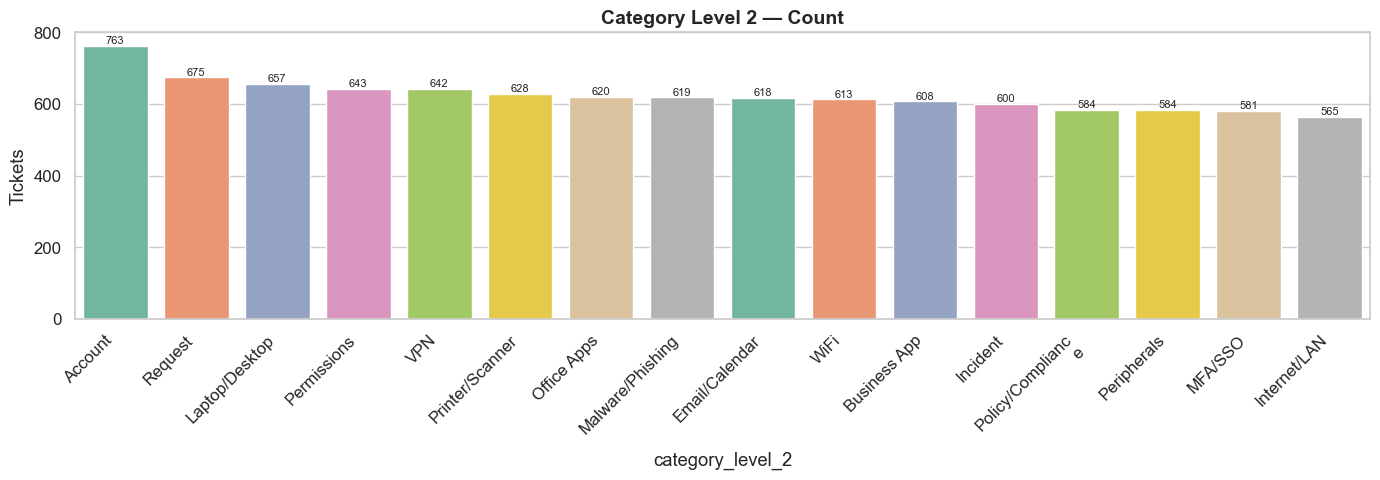

In [30]:
# ── 4. Category Level 2 — Distribution ────────────────────────────────
counts_l2 = df["category_level_2"].value_counts()

fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(x=counts_l2.index, y=counts_l2.values, hue=counts_l2.index, palette=PALETTE, legend=False, ax=ax)
ax.set_title("Category Level 2 — Count", fontsize=14, weight="bold")
ax.set_ylabel("Tickets")
wrap_labels(ax, width=16)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=8)
plt.tight_layout()
plt.show()


C:\Users\albaz\AppData\Local\Temp\ipykernel_4968\419926673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_l3.index, y=counts_l3.values, palette=PALETTE, ax=ax)
C:\Users\albaz\AppData\Local\Temp\ipykernel_4968\362038831.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right")


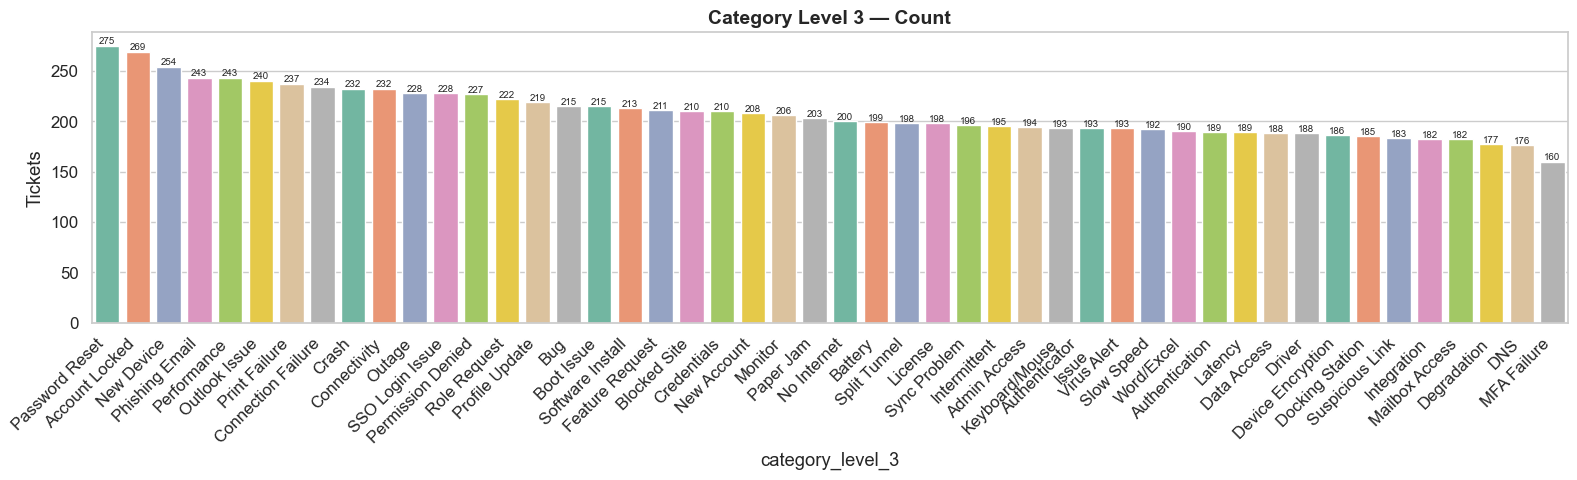

In [15]:
# ── 5. Category Level 3 — Distribution ────────────────────────────────
counts_l3 = df["category_level_3"].value_counts()

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(x=counts_l3.index, y=counts_l3.values, hue=counts_l3.index, palette=PALETTE, legend=False, ax=ax)
ax.set_title("Category Level 3 — Count", fontsize=14, weight="bold")
ax.set_ylabel("Tickets")
wrap_labels(ax, width=18)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=7)
plt.tight_layout()
plt.show()


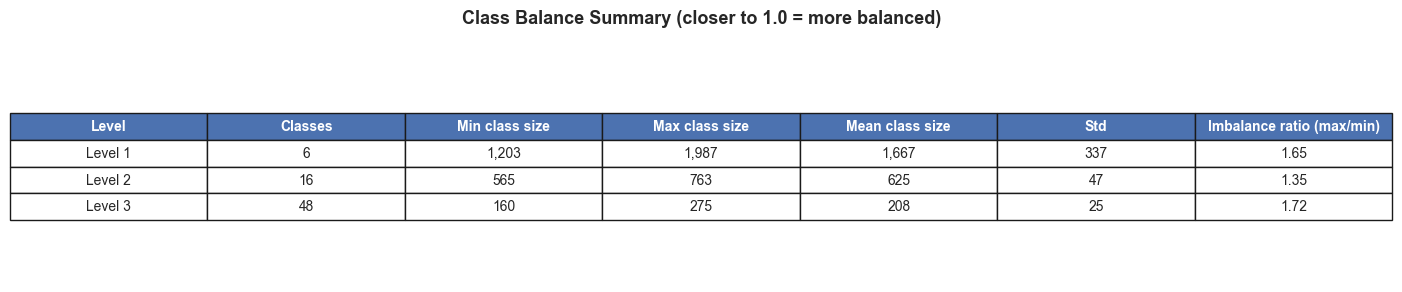

In [16]:
# ── 6. Class Balance Summary Table ────────────────────────────────────
def balance_stats(series, level_name):
    vc = series.value_counts()
    return {
        "Level": level_name,
        "Classes": vc.shape[0],
        "Min class size": f"{vc.min():,}",
        "Max class size": f"{vc.max():,}",
        "Mean class size": f"{vc.mean():,.0f}",
        "Std": f"{vc.std():,.0f}",
        "Imbalance ratio (max/min)": f"{vc.max() / vc.min():.2f}",
    }

balance = pd.DataFrame([
    balance_stats(df["category_level_1"], "Level 1"),
    balance_stats(df["category_level_2"], "Level 2"),
    balance_stats(df["category_level_3"], "Level 3"),
])

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis("off")
tbl = ax.table(cellText=balance.values, colLabels=balance.columns,
               loc="center", cellLoc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.6)
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor("#4C72B0")
        cell.set_text_props(color="white", weight="bold")
ax.set_title("Class Balance Summary (closer to 1.0 = more balanced)",
             fontsize=13, weight="bold", pad=20)
fig.subplots_adjust(left=0.02, right=0.98)
plt.show()


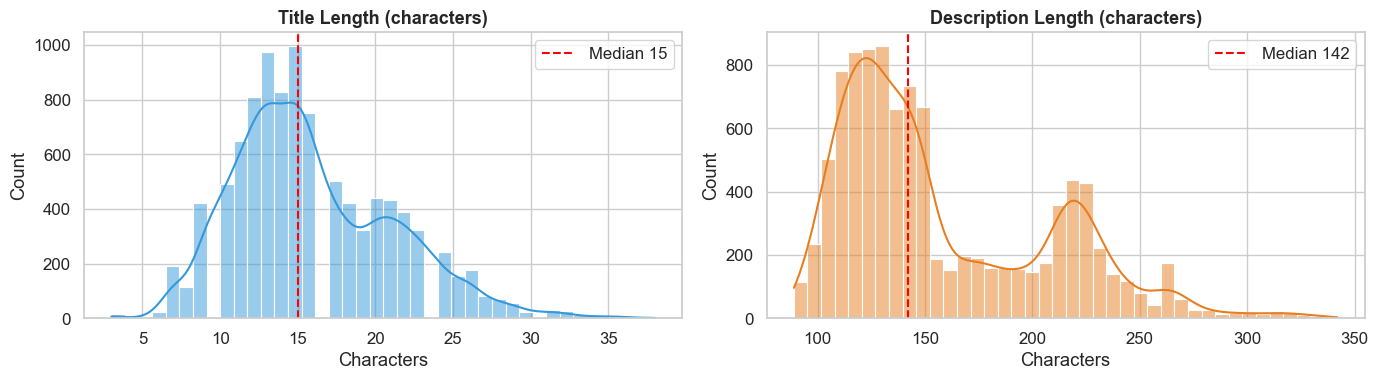

In [17]:
# ── 7. Text Length Distributions (title & description) ────────────────
df["title_len"] = df["title_ar"].astype(str).str.len()
df["desc_len"]  = df["description_ar"].astype(str).str.len()

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df["title_len"], bins=40, kde=True, color="#3498db", ax=axes[0])
axes[0].set_title("Title Length (characters)", fontsize=13, weight="bold")
axes[0].set_xlabel("Characters")
axes[0].axvline(df["title_len"].median(), color="red", ls="--", label=f'Median {df["title_len"].median():.0f}')
axes[0].legend()

sns.histplot(df["desc_len"], bins=40, kde=True, color="#e67e22", ax=axes[1])
axes[1].set_title("Description Length (characters)", fontsize=13, weight="bold")
axes[1].set_xlabel("Characters")
axes[1].axvline(df["desc_len"].median(), color="red", ls="--", label=f'Median {df["desc_len"].median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()


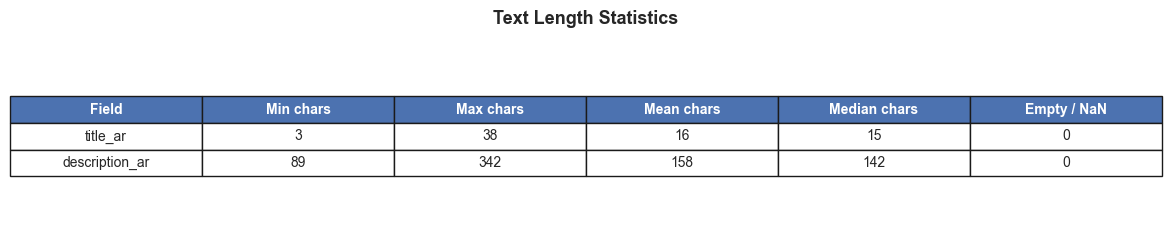

In [18]:
# ── 8. Text Length Stats Table ────────────────────────────────────────
len_stats = pd.DataFrame({
    "Field": ["title_ar", "description_ar"],
    "Min chars": [df["title_len"].min(), df["desc_len"].min()],
    "Max chars": [df["title_len"].max(), df["desc_len"].max()],
    "Mean chars": [f'{df["title_len"].mean():.0f}', f'{df["desc_len"].mean():.0f}'],
    "Median chars": [f'{df["title_len"].median():.0f}', f'{df["desc_len"].median():.0f}'],
    "Empty / NaN": [
        df["title_ar"].isna().sum() + (df["title_ar"].astype(str).str.strip() == "").sum(),
        df["description_ar"].isna().sum() + (df["description_ar"].astype(str).str.strip() == "").sum(),
    ],
})

fig, ax = plt.subplots(figsize=(10, 2.2))
ax.axis("off")
tbl = ax.table(cellText=len_stats.values, colLabels=len_stats.columns,
               loc="center", cellLoc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.6)
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor("#4C72B0")
        cell.set_text_props(color="white", weight="bold")
ax.set_title("Text Length Statistics", fontsize=13, weight="bold", pad=20)
fig.subplots_adjust(left=0.02, right=0.98)
plt.show()


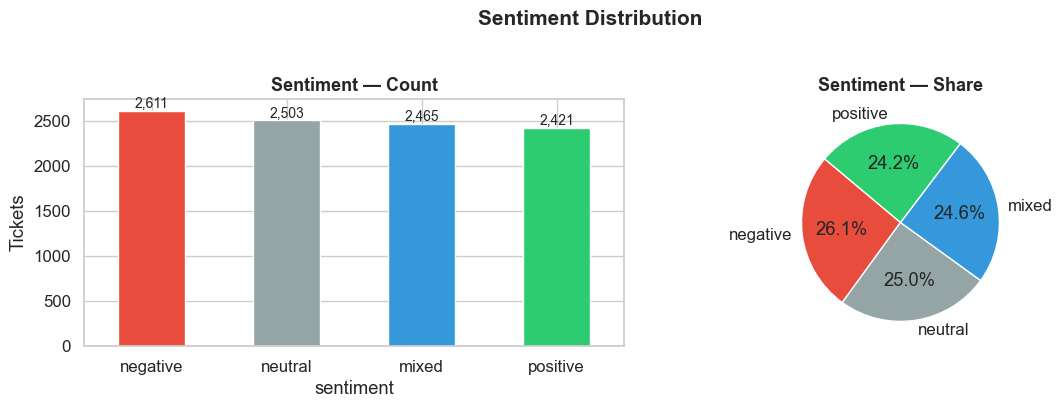

In [19]:
# ── 9. Sentiment Distribution ─────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sent_counts = df["sentiment"].value_counts()
sent_colors = {"negative": "#e74c3c", "neutral": "#95a5a6", "positive": "#2ecc71"}
bar_colors = [sent_colors.get(s, "#3498db") for s in sent_counts.index]

sent_counts.plot.bar(ax=axes[0], color=bar_colors)
axes[0].set_title("Sentiment — Count", fontsize=13, weight="bold")
axes[0].set_ylabel("Tickets")
axes[0].tick_params(axis="x", rotation=0)
for p in axes[0].patches:
    axes[0].annotate(f"{int(p.get_height()):,}",
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha="center", va="bottom", fontsize=10)

sent_counts.plot.pie(ax=axes[1], autopct="%1.1f%%", startangle=140,
                     colors=bar_colors)
axes[1].set_ylabel("")
axes[1].set_title("Sentiment — Share", fontsize=13, weight="bold")

plt.suptitle("Sentiment Distribution", fontsize=15, weight="bold", y=1.02)
plt.tight_layout()
plt.show()


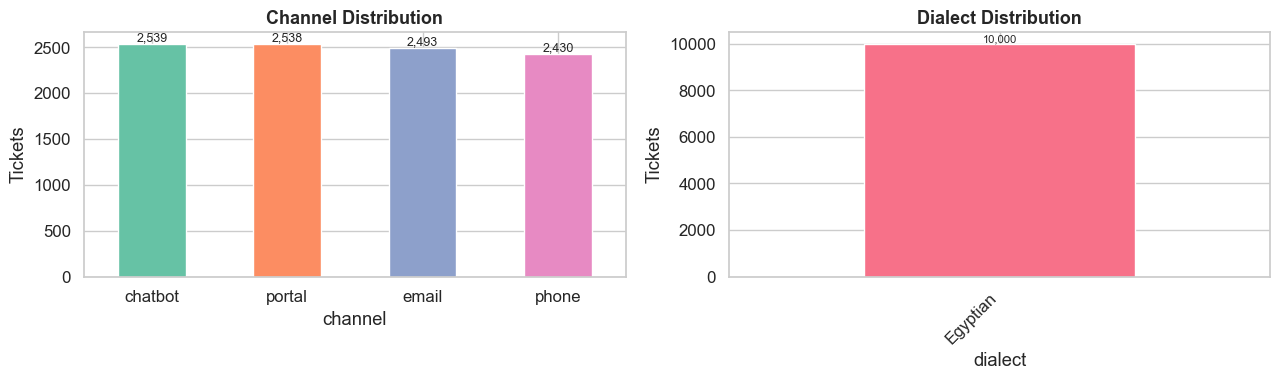

In [20]:
# ── 10. Channel & Dialect Distributions ───────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

ch_counts = df["channel"].value_counts()
ch_counts.plot.bar(ax=axes[0], color=sns.color_palette(PALETTE, len(ch_counts)))
axes[0].set_title("Channel Distribution", fontsize=13, weight="bold")
axes[0].set_ylabel("Tickets")
axes[0].tick_params(axis="x", rotation=0)
for p in axes[0].patches:
    axes[0].annotate(f"{int(p.get_height()):,}",
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha="center", va="bottom", fontsize=9)

di_counts = df["dialect"].value_counts()
di_counts.plot.bar(ax=axes[1], color=sns.color_palette("husl", len(di_counts)))
axes[1].set_title("Dialect Distribution", fontsize=13, weight="bold")
axes[1].set_ylabel("Tickets")
wrap_labels(axes[1], width=12)
for p in axes[1].patches:
    axes[1].annotate(f"{int(p.get_height()):,}",
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()


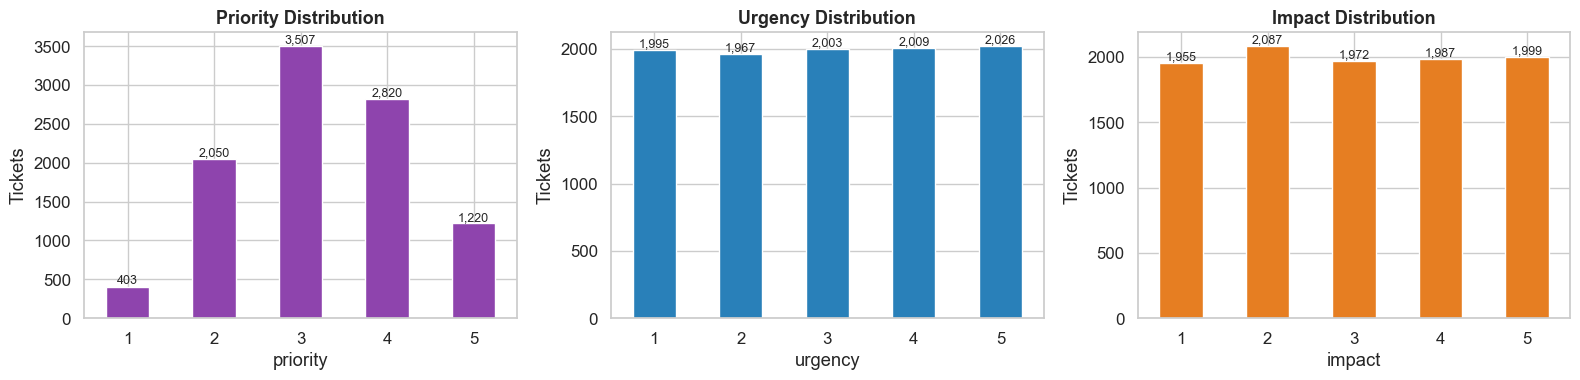

In [21]:
# ── 11. Priority / Urgency / Impact Distributions ────────────────────
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for ax, col, color in zip(axes,
                           ["priority", "urgency", "impact"],
                           ["#8e44ad", "#2980b9", "#e67e22"]):
    vc = df[col].value_counts().sort_index()
    vc.plot.bar(ax=ax, color=color, edgecolor="white")
    ax.set_title(f"{col.title()} Distribution", fontsize=13, weight="bold")
    ax.set_ylabel("Tickets")
    ax.tick_params(axis="x", rotation=0)
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height()):,}",
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


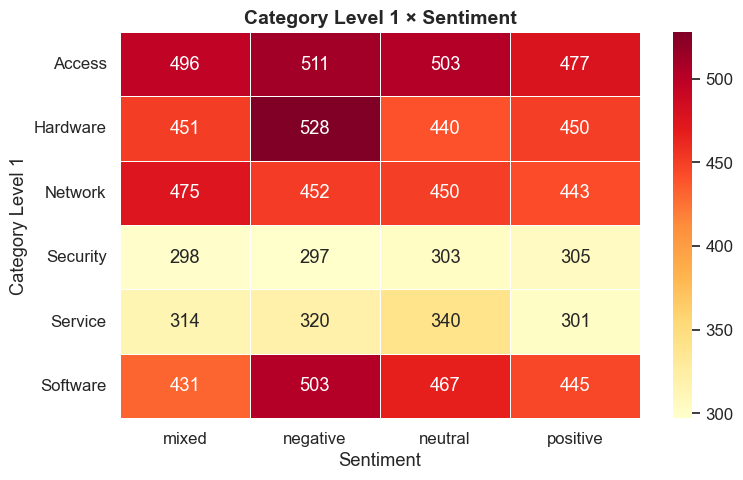

In [22]:
# ── 12. Category L1 × Sentiment Heatmap ──────────────────────────────
ct = pd.crosstab(df["category_level_1"], df["sentiment"])

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(ct, annot=True, fmt=",", cmap="YlOrRd", linewidths=0.5, ax=ax)
ax.set_title("Category Level 1 × Sentiment", fontsize=14, weight="bold")
ax.set_ylabel("Category Level 1")
ax.set_xlabel("Sentiment")
plt.tight_layout()
plt.show()


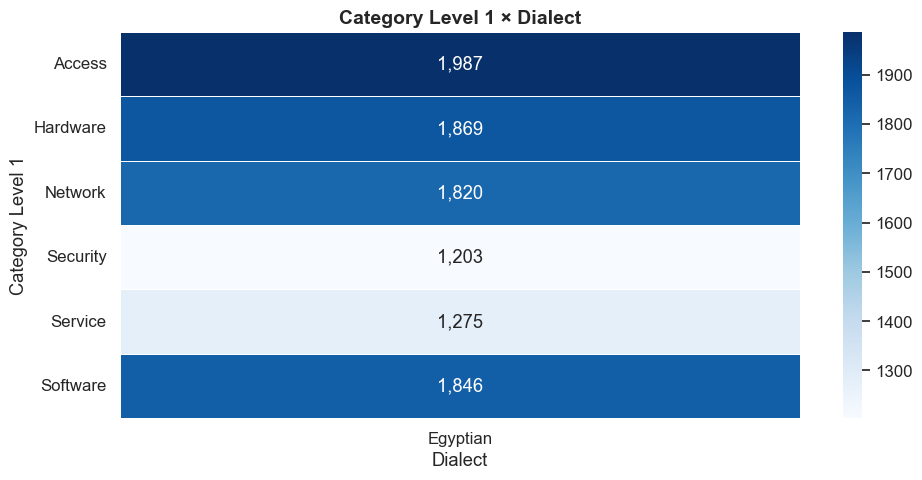

In [23]:
# ── 13. Category L1 × Dialect Heatmap ────────────────────────────────
ct2 = pd.crosstab(df["category_level_1"], df["dialect"])

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(ct2, annot=True, fmt=",", cmap="Blues", linewidths=0.5, ax=ax)
ax.set_title("Category Level 1 × Dialect", fontsize=14, weight="bold")
ax.set_ylabel("Category Level 1")
ax.set_xlabel("Dialect")
plt.tight_layout()
plt.show()


C:\Users\albaz\AppData\Local\Temp\ipykernel_4968\1298660517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="category_level_1", y="desc_len", order=order,


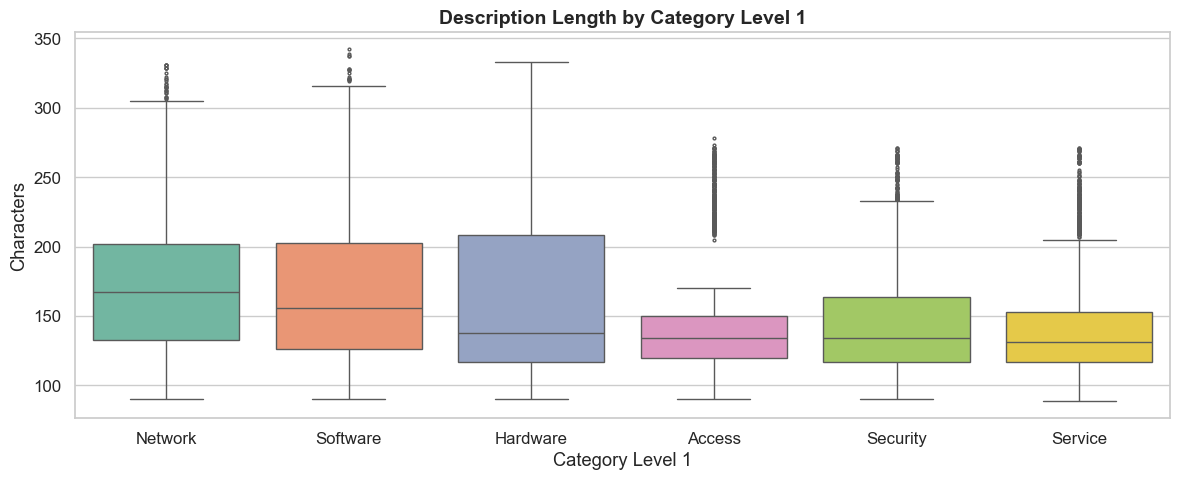

In [24]:
# ── 14. Description Length by Category L1 (box plot) ─────────────────
fig, ax = plt.subplots(figsize=(12, 5))
order = df.groupby("category_level_1")["desc_len"].median().sort_values(ascending=False).index
sns.boxplot(data=df, x="category_level_1", y="desc_len", order=order,
            palette=PALETTE, ax=ax, fliersize=2)
ax.set_title("Description Length by Category Level 1", fontsize=14, weight="bold")
ax.set_ylabel("Characters")
ax.set_xlabel("Category Level 1")
plt.tight_layout()
plt.show()


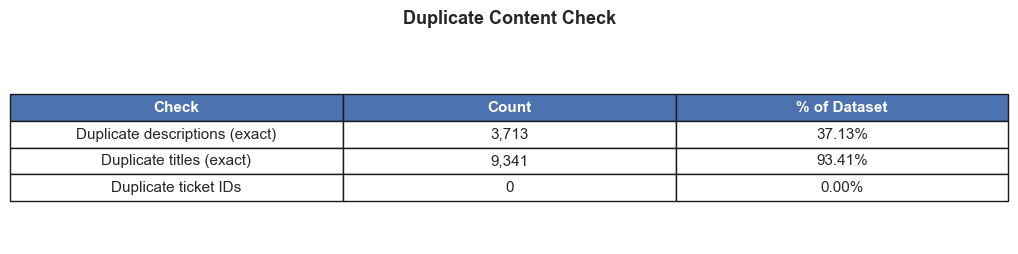

In [25]:
# ── 15. Duplicate Descriptions Check ─────────────────────────────────
dup_desc = df.duplicated(subset="description_ar", keep=False)
dup_title = df.duplicated(subset="title_ar", keep=False)

dup_stats = pd.DataFrame({
    "Check": [
        "Duplicate descriptions (exact)",
        "Duplicate titles (exact)",
        "Duplicate ticket IDs",
    ],
    "Count": [
        f"{dup_desc.sum():,}",
        f"{dup_title.sum():,}",
        f"{df.duplicated(subset='ticket_id').sum():,}",
    ],
    "% of Dataset": [
        f"{dup_desc.sum() / len(df) * 100:.2f}%",
        f"{dup_title.sum() / len(df) * 100:.2f}%",
        f"{df.duplicated(subset='ticket_id').sum() / len(df) * 100:.2f}%",
    ],
})

fig, ax = plt.subplots(figsize=(8, 2.5))
ax.axis("off")
tbl = ax.table(cellText=dup_stats.values, colLabels=dup_stats.columns,
               loc="center", cellLoc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1.3, 1.6)
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor("#4C72B0")
        cell.set_text_props(color="white", weight="bold")
ax.set_title("Duplicate Content Check", fontsize=13, weight="bold", pad=20)
fig.subplots_adjust(left=0.02, right=0.98)
plt.show()


C:\Users\albaz\AppData\Local\Temp\ipykernel_4968\1209295393.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette="viridis", ax=ax)


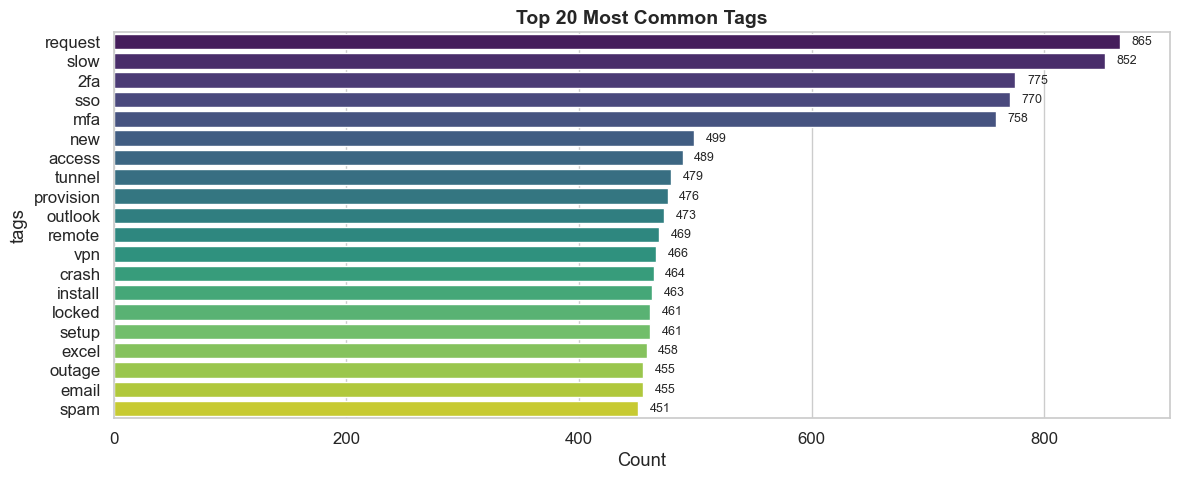

In [26]:
# ── 16. Top-20 Most Common Tags ──────────────────────────────────────
import ast

def safe_parse_tags(val):
    if isinstance(val, list):
        return val
    try:
        parsed = ast.literal_eval(str(val))
        return parsed if isinstance(parsed, list) else []
    except Exception:
        return []

all_tags = df["tags"].apply(safe_parse_tags).explode()
tag_counts = all_tags.value_counts().head(20)

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=tag_counts.values, y=tag_counts.index, hue=tag_counts.index, palette="viridis", legend=False, ax=ax)
ax.set_title("Top 20 Most Common Tags", fontsize=14, weight="bold")
ax.set_xlabel("Count")
for i, v in enumerate(tag_counts.values):
    ax.text(v + 10, i, f"{v:,}", va="center", fontsize=9)
plt.tight_layout()
plt.show()


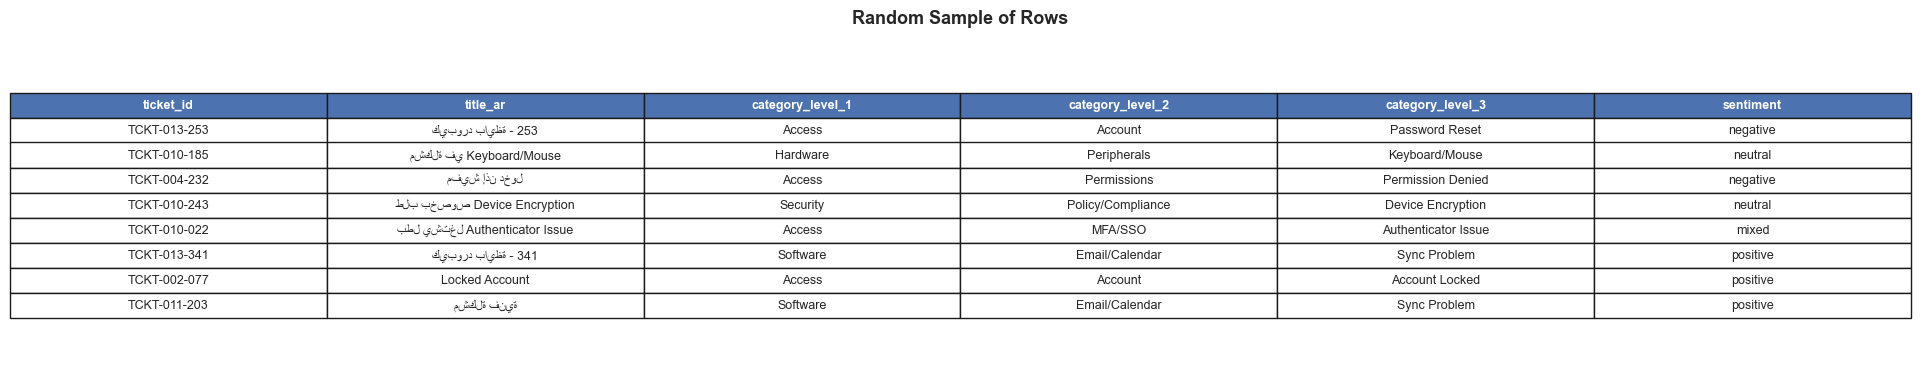

In [27]:
# ── 17. Sample Rows (quick visual sanity check) ──────────────────────
sample_cols = ["ticket_id", "title_ar", "category_level_1",
               "category_level_2", "category_level_3", "sentiment"]
sample = df[sample_cols].sample(8, random_state=42)

fig, ax = plt.subplots(figsize=(18, 4))
ax.axis("off")
tbl = ax.table(cellText=sample.values, colLabels=sample.columns,
               loc="center", cellLoc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.1, 1.5)
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor("#4C72B0")
        cell.set_text_props(color="white", weight="bold")
    cell.set_text_props(ha="center")
ax.set_title("Random Sample of Rows", fontsize=13, weight="bold", pad=20)
fig.subplots_adjust(left=0.02, right=0.98)
plt.show()
